# Lab Assignment Four: Evaluation and Multi-Layer Perceptron

# Team Member Information:

In [1]:
import pandas as pd
names = ['Jiaqi Song','Yuchao Zhang','Zhenxuan Ouyang','Jianmin Li']
smuid = [47534426, 47787029, 47784546, 47794972]
teaminfo = pd.DataFrame()
teaminfo['name'] = names
teaminfo['smu id'] = smuid
teaminfo

,name,smu id
0,Jiaqi Song,47534426
1,Yuchao Zhang,47787029
2,Zhenxuan Ouyang,47784546
3,Jianmin Li,47794972


# 1. Preparation (15 points total)

## 1.1 Business Understanding

#### [5 points] (mostly the same processes as from previous lab) Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the task is and what parties would be interested in the results. How well would your prediction algorithm need to perform to be considered useful by interested parties?

Nowadays mobile phones has become a necessary in almost everyone's life. With the development of technology, mobile has more and more functions. On the market, the price of mobile varies widely depending on what features the phone has, such as RAM, Internal Memory, battery life, camera pixels etc. Suppose there is a new mobile company which has its own mobile phone created. The new phone may have various features, some features may be better than most phones on the market, while some features may be not that good compared with other mobile phone. Given this, how to find out the proper price range is an urgent task for the manager. To solve this problem, the manager asked the marketing department to collect sales data of mobile phones of various companies. However, the manager is not so good at machine learning, he does not know how to estimate price of mobiles their company creates given the collected data. Our objective is to use the collected data to help the company predict its selling price range given the fetures of its mobile phone. The company can also use the model to adjust the price of its mobile since the prices on the market may change frequently.

## 1.2 Data Preprocessing 

#### [10 points] (mostly the same processes as from lab one) Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification (include a description of any newly formed variables you created).

In [2]:
# lets load up the handwritten digit dataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from scipy.special import expit

# Import the dataset
df = pd.read_csv('train.csv')
# The dataset has 2000 instances and 21 features
display(df.shape)

(2000, 21)

In [3]:
# Check the first 5 rows of the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# describe the data summary
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# describe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


From above we can see, there are no missing value and null in the dataset.

In [6]:
# Create a description table
df_describe = pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Features'] = df.columns
df_describe['Data_Type'] = ['Integer', 'Integer','float','Integer','Integer','Integer','Integer','float','Integer','Integer','Integer','Integer','Integer',
                            'Integer','Integer','Integer','Integer','Integer','Integer','Integer','Integer']
df_describe['Description'] = [' total energy a battery can store in one time measured in mAh', 'has bluetooth or not', 'Speed at which microprocessor executes instructions ',
                             'has dual sim support or not', 'front Camera mega pixels', 'has 4G or not', 'internal memory in gigabytes','mobile depth in cm','weight of mobile phone',
                              'number of cores of processor','primary camera mega pixels','pixel resolution height','pixel resolution width','random access memory in mega bytes', 'screen height of mobile in cm','screen width of mobile in cm',
                              'longest time that a single battery charge will last when you are on a call in hours','has 3G or not','has touch screen or not','has wifi or not','price range (0: low cost, 1: medium cost, 2: high cost, 3: very high cost)']
df_describe

,Features,Data_Type,Description
0,battery_power,Integer,total energy a battery can store in one time measured in mAh
1,blue,Integer,has bluetooth or not
2,clock_speed,float,Speed at which microprocessor executes instructions
3,dual_sim,Integer,has dual sim support or not
4,fc,Integer,front Camera mega pixels
5,four_g,Integer,has 4G or not
6,int_memory,Integer,internal memory in gigabytes
7,m_dep,float,mobile depth in cm
8,mobile_wt,Integer,weight of mobile phone
9,n_cores,Integer,number of cores of processor


In [7]:
# check if there are duplicated data
idx = df.duplicated()
print('The number of duplicated data: ' + str(len(df[idx])))

The number of duplicated data: 0


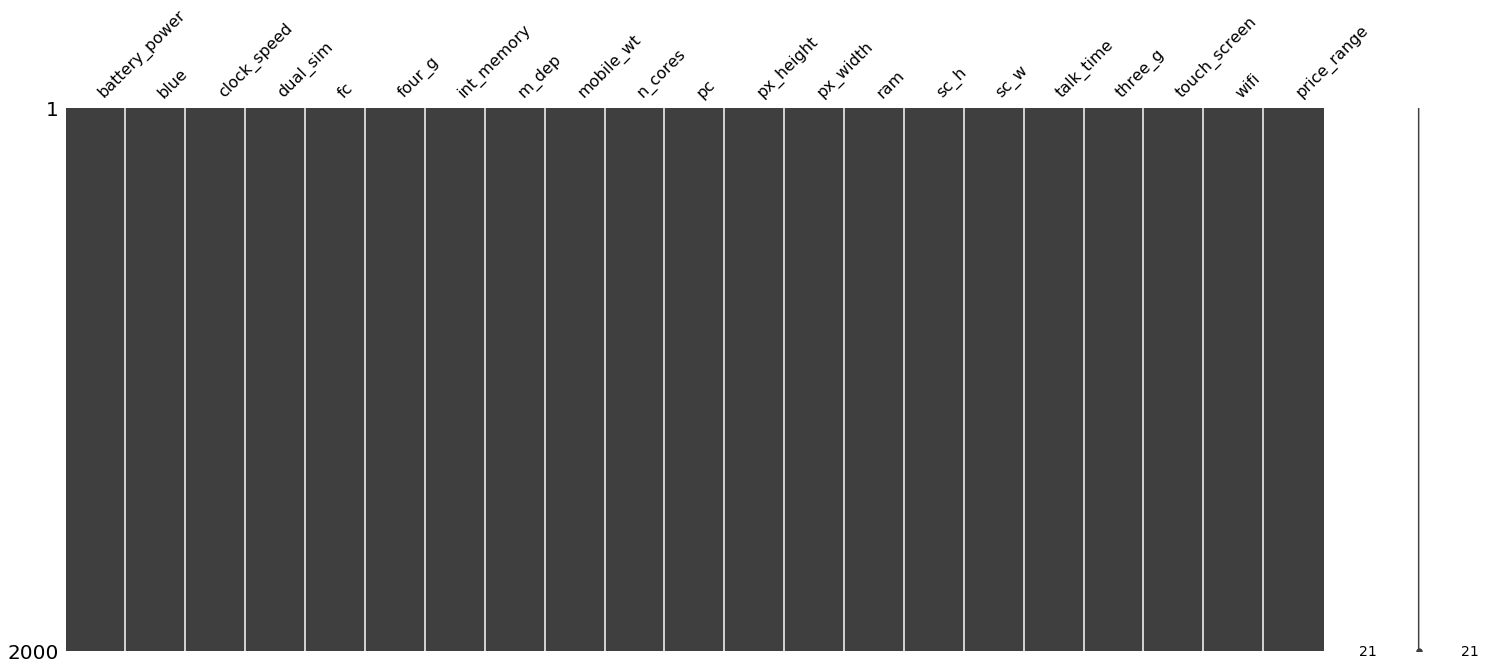

In [9]:
# use the missingno to directly find if there is any missing data
import missingno as mn
mn.matrix(df)

Based on the dataframe information and missingno matrix, there is no missing values or data for this dataset with 2000 instance and 21 features (2000 x 21).

[500 500 500 500]


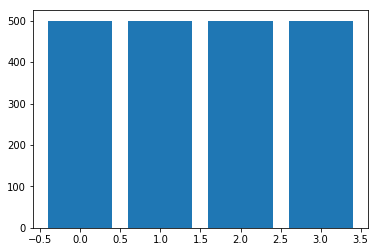

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
# Set our target as the 'charges'
target = df['price_range']
target_names='price_range'
y = target.values
vals = np.bincount(y)
print(vals)
plt.bar(range(len(vals)),vals)
plt.show()
# Delete the column of target from our table
df = df.drop("price_range",axis=1)

From the above figure, we know that the data is evenly distributed among the four classes.

In [11]:
# Since each feature's data has different unit, we need to standarize the data
from sklearn.preprocessing import StandardScaler
X = df.values
X = StandardScaler().fit(X).transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 20)
(1600,)
(400, 20)
(400,)


Then we split original data into 80% training data set and 20% testing data set. After we tuned parameters using k-fold cross validation on training set and get the best parameter, we then evaluate our model on unseen 20% testing dataset.

# 2. Evaluation (30 points total)

## 2.1 Evaluation Metric(s)

#### [15 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s generalization performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why does the metric evaluate performance in terms of the business case you argued for. Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

The metric that we will use to evaluate our algorithm’s generalization performance is F1 score. Our objective is to help the company predict its selling price range given the fetures of its mobile phone. From the producer's perspective, we want as much profit as possible. First, if our model predicts lots of high price range for the phones which actually belong to low range, the precision score of our model would be relatively low. In this case, the customer will find out that the product of this company does not worth the price, it will finally lead to low sales and low profit. Second, if our model predicts lots of low price range for the phones which actually belong to high range, the recall score of our model would be low. A phone which belonged to high price range would have better features and the cost would also be higher. If the company sells lots of high-cost phones at a low price, it will lead to a great loss to the company. Combine the above two aspects, we want our model to have high precison and recall score, and F1 score combines these two metrics. So F1 score is the appropriate evaluation metric for our model. The higher the F1 score, the better our model will be. If some companies have a great confidence in their marketing ability, they do not worry much about the sales, which means they can afford a relatively low precision score of the model. But the company can not stand a high false negatives. In this case, we can form a cost matrix for the confusion matrix evaluation, where we have higher cost for false negatives and lower cost for false positives.

## 2.2 Dividing The Data

#### [15 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time. Convince the reader that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

Because our dataset only have 2000 samples, we used stratified k-fold cross validation in this lab. First we split original data into 80% training data and 20% unseen test data. Our dataset is not time series, so just like the normal way, we break the training data up into K partitions and then, K times in turn, we select one partition for testing and use the remaining ones for training.<br>
Using stratified k-fold method, each sample in our dataset will be used for training and validation once, which helps to achieve low-variance estimation of the model performance compared to the holdout method and we can also get a better estimate of generalization performance of the model which means we can reduce the bias. <br>
For choosing K, in this lab, we used k-fold cross validation in grid search for hyperparameter tuning, in order to reduce the computational cost, we choose 5-fold cross validation in our lab. If we are not concerned with computational cost, 10-fold cross is better.<br>
After we choose the best hyperparameter, we then evaluate the performance of our new model with the best hyperparameter by using 20% unseen test data.<br>
Finally, in order to avoid leaking data into model and overfitting the data, we also used nested cross-validation to better estimate an unbiased generalization performance.

# 3. Modeling (45 points total)

## 3.1 Implementation of Multilayer Perceptron

#### [20 points] Update the MLP class to: When instantiated, use a selectable phi function for the initial layer: either sigmoid or linear | Use a selectable cost function when instantiated: either quadratic or cross entropy | Add support for any number of hidden layers (user customizable).

In [13]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys
# from sklearn.base import BaseEstimator

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class MultiLayerPerceptron(object):
    def __init__(self, n_hiddens_size=(30,), C=0.1, epochs=300, eta=0.001, random_state=1, alpha=0.001, decrease_const=0.0001, 
                 shuffle=True, minibatches=50, initial_phi_func='sigmoid', obj_func='quadratic'):
        np.random.seed(random_state)
        self.n_hiddens_size = n_hiddens_size
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.initial_phi_func = initial_phi_func
        self.obj_func = obj_func
        
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
        
        
    def get_params(self,deep=True):
        return {"n_hiddens_size" : self.n_hiddens_size, "initial_phi_func" : self.initial_phi_func, "obj_func" : self.obj_func}    
        
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    
    def _initialize_weights(self):
        # Make sure self.hidden_layer_sizes is a list
        hiddens_layers = self.n_hiddens_size
        if not hasattr(hiddens_layers, "__iter__"):
            hiddens_layers = [hiddens_layers]
        hiddens_layers = list(hiddens_layers)
        hiddens_layers += [self.n_output_]

        """Initialize weights with small random numbers."""
        weights_list = []
        pre_features = self.n_features_
        num_of_layers = len(hiddens_layers)
        for idx, n_hidden in enumerate(hiddens_layers):
            if self.initial_phi_func == 'sigmoid' or self.initial_phi_func == 'linear':
                W1_num_elems = (pre_features+1) * n_hidden
                W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
                W1 = W1.reshape(n_hidden, pre_features+1) # reshape to be W
            elif self.initial_phi_func == 'relu' or self.initial_phi_func == 'silu':
                if idx == num_of_layers-1:
                    # reduce the final layer magnitude in order to balance the size of the gradients between
                    init_bound = np.sqrt(0.5 / (n_hidden + pre_features + 1))
                else:
                    init_bound = np.sqrt(6. / (n_hidden + pre_features + 1))
                W1 = np.random.uniform(-init_bound, init_bound, (n_hidden, pre_features+1))
                W1[:, :1] = 0
            pre_features = n_hidden
            weights_list += [W1]
            
        return weights_list
    
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z.copy())
    
    
    @staticmethod
    def _linear(z):
        return z
    
        
    @staticmethod
    def _relu(Z):
        return np.maximum(0,Z.copy())
    
    
    @staticmethod
    def _silu(Z):
        Z = Z.copy() * expit(Z.copy())
        return Z
    
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    
    @staticmethod
    def _L2_reg(lambda_, weights_list):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        weights = 0
        for W in weights_list:
            weights += np.mean(W[:, 1:] ** 2)
        return (lambda_/2.0) * np.sqrt(weights)
    
    
    def _cost(self, output ,Y_enc, weights_list):
        '''Get the objective function value'''
        if self.obj_func == 'quadratic':
            cost = np.mean((Y_enc-output)**2)
        elif self.obj_func == 'cross_entropy':
            cost = -np.mean(np.nan_to_num((Y_enc*np.log(output)+(1-Y_enc)*np.log(1-output))))
        L2_term = self._L2_reg(self.l2_C, weights_list)
        return cost + L2_term
    
    
    def _feedforward(self, X, weights_list):
        """Compute feedforward step
        """
        A_list = []
        Z_list = []
        pre_Z = None
        for idx, W in enumerate(weights_list):
            if idx == 0:
                A1 = self._add_bias_unit(X.T, how='row')
            else:
                if self.initial_phi_func == 'sigmoid':
                    A1 = self._sigmoid(pre_Z)
                elif self.initial_phi_func == 'linear':
                    A1 = self._linear(pre_Z)
                elif self.initial_phi_func == 'relu':
                    A1 = self._relu(pre_Z)
                elif self.initial_phi_func == 'silu':
                    A1 = self._silu(pre_Z)
                A1 = self._add_bias_unit(A1, how='row')
            Z1 = W @ A1
            A_list += [A1]
            Z_list += [Z1]
            pre_Z = Z1
        A_output = self._sigmoid(pre_Z)
        A_list += [A_output]
            
        return A_list, Z_list
    
    
    def _get_gradient(self, A_list, Z_list, Y_enc, weights_list):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        gradients_list = []
        A_output = A_list[-1]
        
        if self.obj_func == 'quadratic':
            V_last = -2 * (Y_enc - A_output) * A_output * (1-A_output)  # last layer sensitivity
        elif self.obj_func == 'cross_entropy':
            V_last = (A_output - Y_enc)
        
        length = len(weights_list)
        count = 1
        for A, W in zip(A_list[:-1][::-1], weights_list[::-1]):
            if count == 1:
                grad = V_last @ A.T # no bias on final layer
                V1 = (W.T @ V_last) # back prop the sensitivity
            else:
                grad = V_last[1:,:] @ A.T # dont back prop sensitivity of bias
                if count != length:
                    V1 = (W.T @ V_last[1:, :])
            
            if length-1-count >= 0:
                if self.initial_phi_func == 'sigmoid':
                    V1 = A * (1 - A) * V1
                elif self.initial_phi_func == 'linear':
                    V1 = V1
                elif self.initial_phi_func == 'relu':
                    Z1_with_bias = self._add_bias_unit(Z_list[length-1-count],how='row')
                    V1[Z1_with_bias<=0] = 0
                elif self.initial_phi_func == 'silu':
                    Z1_with_bias = self._add_bias_unit(Z_list[length-1-count],how='row')
                    V1 = (A + (1-A) * self._sigmoid(Z1_with_bias)) * V1
                V_last = V1

            # regularize weights that are not bias terms
            grad[:, 1:] += W[:, 1:] * self.l2_C
            gradients_list.insert(0, grad)
            
            count += 1

        return gradients_list
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.weights_list = self._initialize_weights()

        W_prev_list = []
        for W in self.weights_list:
            delta_W_prev = np.zeros(W.shape)
            W_prev_list += [delta_W_prev]

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        
        num_of_layers = len(self.n_hiddens_size)
        self.grad_w_ = []
        for i in range(num_of_layers+1):
            self.grad_w_.append(np.zeros(self.epochs, dtype=float))
            
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                # feedforward
                A_list, Z_list = self._feedforward(X_data[idx], self.weights_list)
                
                cost = self._cost(A_list[-1], Y_enc[:, idx], self.weights_list)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradients_list = self._get_gradient(A_list, Z_list, Y_enc[:, idx], self.weights_list)

                # momentum calculations
                delta_W_list = []
                for gradient in gradients_list:
                    delta_W = self.eta * gradient
                    delta_W_list += [delta_W]
                
                for idx in range(len(self.weights_list)):
                    self.weights_list[idx] -= (delta_W_list[idx] + (self.alpha * W_prev_list[idx]))
                    W_prev_list[idx] = delta_W_list[idx]

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
                            
            for idx in range(len(self.grad_w_)):
                self.grad_w_[idx][i] += np.mean(abs(gradients_list[idx]))
            
        return self
    
    
    def fit_full(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.weights_list = self._initialize_weights()

        self.cost_ = []
        
        num_of_layers = len(self.n_hiddens_size)
        self.grad_w_ = []
        for i in range(num_of_layers+1):
            self.grad_w_.append(np.zeros(self.epochs, dtype=float))
            
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A_list, Z_list = self._feedforward(X_data, self.weights_list)
            
            cost = self._cost(A_list[-1], Y_enc, self.weights_list)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradients_list = self._get_gradient(A_list, Z_list, Y_enc, self.weights_list)
            
            for idx in range(len(self.grad_w_)):
                self.grad_w_[idx][i] += np.mean(abs(gradients_list[idx]))
                
            length = len(self.weights_list)
            for idx in range(length):
                self.weights_list[idx] -= self.eta * gradients_list[idx]

        return self
    
    
    def predict(self, X):
        """Predict class labels"""
        A_list, _ = self._feedforward(X, self.weights_list)
        y_pred = np.argmax(A_list[-1], axis=0)
        return y_pred

First, in order to support any number of hidden layers, we add parameter "n_hiddens_size" in initial function "def _init_" in Class "MultiLayerPerceptron". The "n_hiddens_size" parameter is a tuple and each element in this tuple is the number of hidden units in each layer, ex. (50,60,) means two hidden layers are initialized and the first hidden layer has 50 hidden units and the second hidden layer has 60 hidden units. Inside function "def _initialize_weights", we converted tuple into a list and created a for loop to initialize the weights for each layer according to how many hidden units each layer has. Inside function "def _L2_reg", we add a for loop to calculate the l2 regularization of those weights. Inside function "def _feedforward", the parameter of the function is "weights_list" instead of just W1 and W1, we also created list A_list for storing results of A and we created Z_list for storing results of C, like before we also added a for loop in order to calculate A and Z from each layers and weights and put the results into A_list and Z_list. Inside function "def _get_gradient", the parameter of the function is not just W1 W2 A1 A2 A3 Z1 and Z2, however this time the parameter of the function is weights_list, A_list and Z_list because we need to support any number of hidden layers, then we added a for loop to calculate gradients of each layer. When we backpropogate, we need to remove the bias term of each layer except the last layer. Inside function "def fit" and function "def fit_full"(We implement two fit functions, one is using minibatch, another one is not using minibatch), we added a for loop to update weights of each layer. <br>
Second, in order to support different initial phi function, we add parameter "initial_phi_func" in initial function "def _init_". In our implementation, we didn't just use this phi function in first layer, we use this phi function in every layer. And we implement four different phi function, 'linear', 'sigmoid', 'relu' and 'silu'. So user can choose phi function among those four phi functions. Inside Class "MultiLayerPerceptron", we add three activation functions, "def _linear(z)", "def _relu(z)" and "def _silu(z)". Inside function "def _feedforward(self, X, weights_list)", we add if statement to determine which phi function is being used, but for the last layer we still use sigmoid function. Inside function "def _get_gradient(self, A_list, Z_list, Y_enc, weights_list)", we also need to add if statement to determine which phi function is being used and calculate sensitivity according to phi function. <br>
Third, in order to support different objective function, we add parameter "obj_func" in initial function "def _init_". Inside function "def _get_gradient(self, A_list, Z_list, Y_enc, weights_list)", we add if statement to determine which objective function is being used and calculate the sensitivity of the last layer according to objective function. Inside function "def _cost(self, output ,Y_enc, weights_list)", we also need to add if statement to determine which objective function is being used and calculate cost according to objective function.

## 3.2 Tune Hyper-parameters

#### [15 points] Tune the hyper-parameters of your MLP model (phi function, objective function, and number of layers). While tuning hyper-parameters, analyze the results using your chosen metric(s) of evaluation. Visualize the evaluation metric(s) versus the hyper-parameters. Conclude what combination of parameters are best.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)

In [15]:
scorer = make_scorer(f1_score, average='macro', pos_label=0)
layer_range = [(50,), (50,50,), (50,50,50,), (50,50,50,50,)]
initial_phi_func = ['linear', 'sigmoid', 'relu', 'silu']
obj_func = ['quadratic', 'cross_entropy']
f1_list = []
for layer in layer_range:
    for phi in initial_phi_func:
        for obj in obj_func:
            scores = cross_val_score(estimator=MultiLayerPerceptron(n_hiddens_size=layer, initial_phi_func=phi, obj_func=obj),
                                     X=X_train,
                                     y=y_train,
                                     scoring=scorer,
                                     cv=5,
                                     n_jobs=1)
            f1_list.append(scores)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in log
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in multiply
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: overflow encountered in square


First we make a scorer to measure the f1 score of the model, like we said in Evaluation section, and we used 'macro' method because our dataset is multi-class. And we start tuning the hyperparameters, the layer_range are [(50,), (50,50,), (50,50,50,), (50,50,50,50,)], the phi function are ['linear', 'sigmoid', 'relu', 'silu'] and objective functions are ['quadratic', 'cross_entropy']. Then we make a for loop to try different combination of hyperparameters. For each combination, we used 5 fold cross validation to evaluation the model, like we said in evaluation section. For result of each combination, we store it into a list "f1_list".

Text(0.5, 1.0, 'F1 Scores VS. Combination')

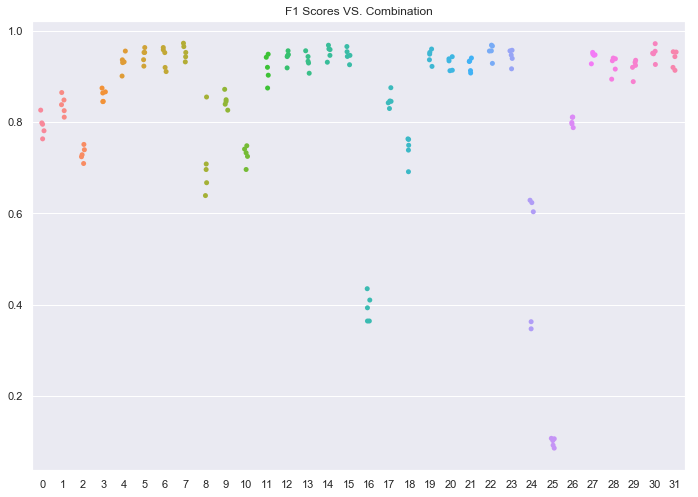

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.stripplot(data=f1_list, jitter=True).set_title('F1 Scores VS. Combination')

Then we visulize the f1 scores verse different combination. As we can see above, the combination at index 7, the combination at index 14, the combination at index 22 and the combination at index 30, all three of them perform well and they have similar results. The combination at index 7 is {'n_hiddens_size': (50,), 'initial_phi_func': 'silu', 'obj_func': 'quadratic'}, the combination at index 14 is {'n_hiddens_size': (50, 50), 'initial_phi_func': 'relu', 'obj_func': 'cross_entropy'}, the combination at index 22 is {'n_hiddens_size': (50, 50, 50), 'initial_phi_func': 'silu', 'obj_func': 'quadratic'}, the combination at index 30 is {'n_hiddens_size': (50, 50, 50, 50), 'initial_phi_func': 'silu', 'obj_func': 'quadratic'}. In order to validate our result and determine which one among these three combination is better, we then use Grid Search as following.

In [17]:
pipe_mlp = make_pipeline(MultiLayerPerceptron())
scorer = make_scorer(f1_score, average='macro', pos_label=0)
layer_range = [(50,), (50,50,), (50,50,50,), (50,50,50,50,)]
param_grid = [{'multilayerperceptron__n_hiddens_size': layer_range, 
               'multilayerperceptron__initial_phi_func': ['linear', 'sigmoid', 'relu', 'silu'],
               'multilayerperceptron__obj_func': ['quadratic', 'cross_entropy']}]

gs = GridSearchCV(estimator=pipe_mlp,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=5,
                  n_jobs=1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in log
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in multiply
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: overflow encountered in square


0.95464173111024
{'multilayerperceptron__initial_phi_func': 'silu', 'multilayerperceptron__n_hiddens_size': (50, 50, 50), 'multilayerperceptron__obj_func': 'quadratic'}


Using the same parameter combination and the same 5 fold cross validation for each combination, we perform the grid search for our hyperparameters. And the best result from grid search is 0.95464 for f1 score and the best combination is {'multilayerperceptron__initial_phi_func': 'silu', 'multilayerperceptron__n_hiddens_size': (50, 50, 50), 'multilayerperceptron__obj_func': 'quadratic'} at index 22. From there, we get our best hyperparameters, that is (50, 50, 50,) for n_hiddens_size, 'silu' for phi function and 'quadratic' for objective function.

In [23]:
params = dict(n_hiddens_size=(50,50,50,), 
              C=0.1, # tradeoff L2 regularizer
              epochs=300, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              alpha=0.001,
              decrease_const=0.0001,
              shuffle=True,
              minibatches=50,
              initial_phi_func='silu',
              obj_func = 'quadratic')

In [24]:
from sklearn.metrics import f1_score
nn = MultiLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=10)
yhat = nn.predict(X_test)
print('Test acc:',f1_score(y_test,yhat,average='macro'))

Epoch: 300/300

Test acc: 0.9627205935462345


After we get the best parameters, we then use them on unseen 20% test dataset, as we can see, the generalization performance of our model is about 0.96272 f1 score.

In [21]:
pipe_mlp = make_pipeline(MultiLayerPerceptron())
scorer = make_scorer(f1_score, average='macro', pos_label=0)
layer_range = [(50,), (50,50,), (50,50,50,), (50,50,50,50,)]
param_grid = [{'multilayerperceptron__n_hiddens_size': layer_range, 
               'multilayerperceptron__initial_phi_func': ['linear', 'sigmoid', 'relu', 'silu'],
               'multilayerperceptron__obj_func': ['quadratic', 'cross_entropy']}]

gs = GridSearchCV(estimator=pipe_mlp,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=2,
                  n_jobs=1)
f1_scores = cross_val_score(gs, X_train, y_train, scoring=scorer, cv=5)
%time

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in log
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in multiply
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: overflow encountered in square


Wall time: 0 ns


In [22]:
print('F1 Scores: %.3f +/- %.3f' % (np.mean(f1_scores), np.std(f1_scores)))

F1 Scores: 0.947 +/- 0.013


In order to avoid leaking data into model and overfitting the data, like we talked about in Evaluation Section, we also use nested cross-validation to better estimate an unbiased generalization performance. In outer loop we use 5-fold and in inner loop we use 2-fold. As we can see, using nested cross validation, we get 0.947 +/- 0.013 F1 score.

## 3.3 Magnitude of the Gradients vs Iterations

#### [10 points] Visualize the magnitude of the gradients in each layer of the neural network versus the training iteration. Do the gradients stay consistent in each layer?

Remember we implemented two fit function, one is not using mini-batch, momentum, adaptive learning rate and the other is using mini-batch, momentum, adaptive learning rate . In the following, we visualize magnitude of the gradients verse iterations of both schemes using our best hyperparameters.

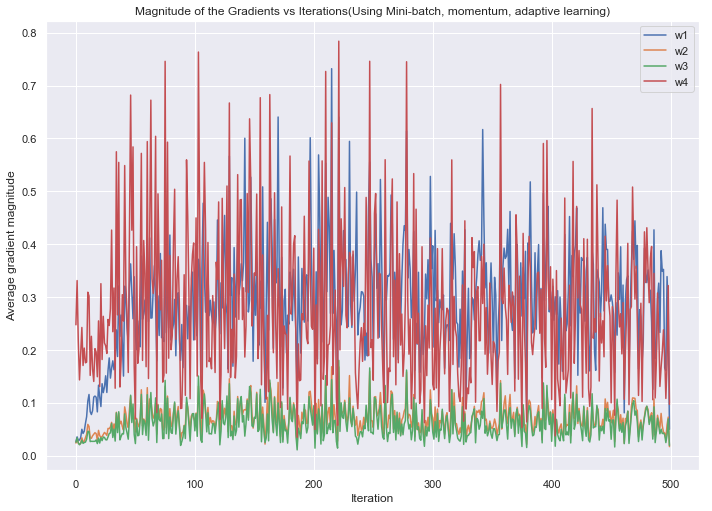

In [26]:
clf = MultiLayerPerceptron(epochs=500, n_hiddens_size=(50,50,50), initial_phi_func='silu', obj_func='quadratic')
clf.fit(X,y)

ax = plt.subplot(1,1,1)
for idx in range(len(clf.grad_w_)):
    plt.plot(abs(clf.grad_w_[idx]), label='w{}'.format(str(idx+1)))
plt.legend()
plt.title('Magnitude of the Gradients vs Iterations(Using Mini-batch, momentum, adaptive learning)')
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

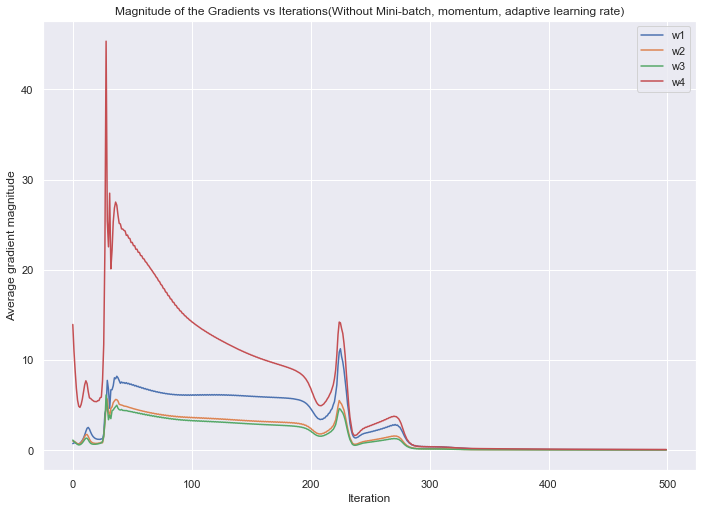

In [27]:
clf = MultiLayerPerceptron(epochs=500, n_hiddens_size=(50,50,50,), initial_phi_func='silu', obj_func='quadratic')
clf.fit_full(X,y)

ax = plt.subplot(1,1,1)
for idx in range(len(clf.grad_w_)):
    plt.plot(abs(clf.grad_w_[idx]), label='w{}'.format(str(idx+1)))
plt.legend()
plt.title('Magnitude of the Gradients vs Iterations(Without Mini-batch, momentum, adaptive learning rate)')
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

From above we can see, In both schemes(Using mini-batch, momentum, adaptive learning rate and not using them), there is still some wights overpower other weights. In scheme of using mini-batch, momentum and adaptive learning rate, w1 and w4 are always higher than w2 and w3 meaning w1 and w4 learns faster than w2 and w3. Likewise, in scheme of not using mini-batch, momentum and adaptive learning rate, w4 is higher than w1 and w1 is higher than w2 and w2 is higher than w3. From the both of schemes we can see, we don't think the gradients stay consistent in each layers. Even though we don't know if our guessing is correct, we think the vanishing gradients in scheme of not using mini-batch, momentum and adaptive learning rate is serious than scheme of using mini-batch, momentum and adaptive learning rate.

# 4. Exceptional Work (10 points total)

#### You have free reign to provide additional analyses.
#### One idea (required for 7000 level students):  Implement two more phi functions: ReLU and SiLU (also called Swish). Compare their performance to the linear and sigmoid phi functions. 

## 4.1 Relu Implementation

We've already implemented the relu and silu phi function in Modeling Section, but for making it more clear, we extends the class "MultiLayerPerceptron" and implemented relu and silu again in the following.

In [28]:
class MLPReLu(MultiLayerPerceptron):
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        # suggested relu/sigmoid bounds
        #Xavier Glorot, Yoshua Bengio ; 
        #  Understanding the difficulty of training deep feedforward neural networks
        #  Conference on Artificial Intelligence and Statistics, PMLR 9:249-256, 2010.
        # Make sure self.hidden_layer_sizes is a list    
        hiddens_layers = self.n_hiddens_size
        if not hasattr(hiddens_layers, "__iter__"):
            hiddens_layers = [hiddens_layers]
        hiddens_layers = list(hiddens_layers)
        hiddens_layers += [self.n_output_]

        """Initialize weights with small random numbers."""
        weights_list = []
        pre_features = self.n_features_
        num_of_layers = len(hiddens_layers)
        for idx, n_hidden in enumerate(hiddens_layers):
            if idx == num_of_layers-1:
                # reduce the final layer magnitude in order to balance the size of the gradients between
                init_bound = np.sqrt(0.5 / (n_hidden + pre_features + 1))
            else:
                init_bound = np.sqrt(6. / (n_hidden + pre_features + 1))
            W1 = np.random.uniform(-init_bound, init_bound, (n_hidden, pre_features+1))
            W1[:, :1] = 0
            pre_features = n_hidden
            weights_list += [W1]
        
        return weights_list
    
    
    @staticmethod
    def _relu(Z):
        return np.maximum(0,Z.copy())
        
        
    def _feedforward(self, X, weights_list):
        """Compute feedforward step
        """
        # A1->W1->ReLu->A2->W2->Sigmoid
        A_list = []
        Z_list = []
        pre_Z = None
        for idx, W in enumerate(weights_list):
            if idx == 0:
                A1 = self._add_bias_unit(X.T, how='row')
            else:
                A1 = self._relu(pre_Z)
                A1 = self._add_bias_unit(A1, how='row')
            Z1 = W @ A1
            A_list += [A1]
            Z_list += [Z1]
            pre_Z = Z1
        A_output = self._sigmoid(pre_Z)
        A_list += [A_output]
            
        return A_list, Z_list
    
    
    def _get_gradient(self, A_list, Z_list, Y_enc, weights_list):
        
        # V3[Z2<=0] = 0 # can change to be relu back prop on this layer too!
        
        # old update: V1 = A2*(1-A2)*(W2.T @ V2)
        # the derivative of sigmoid was A2(1-A2), but now that is relu
        # so we change it to:
    
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        gradients_list = []
        A_output = A_list[-1]
        
        if self.obj_func == 'quadratic':
            V_last = -2 * (Y_enc - A_output) * A_output * (1-A_output)  # last layer sensitivity
        elif self.obj_func == 'cross_entropy':
            V_last = (A_output - Y_enc)
        
        length = len(weights_list)
        count = 1
        for A, W in zip(A_list[:-1][::-1], weights_list[::-1]):
            if count == 1:
                grad = V_last @ A.T # no bias on final layer
                V1 = (W.T @ V_last) # back prop the sensitivity
            else:
                grad = V_last[1:,:] @ A.T # dont back prop sensitivity of bias
                if count != length:
                    V1 = (W.T @ V_last[1:, :])
            
            if length-1-count >= 0:
                Z1_with_bias = self._add_bias_unit(Z_list[length-1-count],how='row')
                V1[Z1_with_bias<=0] = 0
                V_last = V1

            # regularize weights that are not bias terms
            grad[:, 1:] += (W[:, 1:] * self.l2_C)
            gradients_list.insert(0, grad)      

            count += 1

        return gradients_list

For implementing relu phi function, we first update function "def _initialize_weights(self)" in order to initilize weights with small random numbers. Then we add relu function "def _relu(Z)" in extended class. We also update function "def _feedforward(self, X, weights_list)" to replace activation function by relu phi function in each layer except for the last layer. Finally, we calculate the detrivative of the relu function and update the backpropagation procedure in function "def _get_gradient(self, A_list, Z_list, Y_enc, weights_list)".

## 4.2 Silu Implementation 

In [29]:
class MLPSiLu(MultiLayerPerceptron):
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        # suggested relu/sigmoid bounds
        #Xavier Glorot, Yoshua Bengio ; 
        #  Understanding the difficulty of training deep feedforward neural networks
        #  Conference on Artificial Intelligence and Statistics, PMLR 9:249-256, 2010.
        # Make sure self.hidden_layer_sizes is a list    
        hiddens_layers = self.n_hiddens_size
        if not hasattr(hiddens_layers, "__iter__"):
            hiddens_layers = [hiddens_layers]
        hiddens_layers = list(hiddens_layers)
        hiddens_layers += [self.n_output_]

        """Initialize weights with small random numbers."""
        weights_list = []
        pre_features = self.n_features_
        num_of_layers = len(hiddens_layers)
        for idx, n_hidden in enumerate(hiddens_layers):
            if idx == num_of_layers-1:
                # reduce the final layer magnitude in order to balance the size of the gradients between
                init_bound = np.sqrt(0.5 / (n_hidden + pre_features + 1))
            else:
                init_bound = np.sqrt(6. / (n_hidden + pre_features + 1))
            W1 = np.random.uniform(-init_bound, init_bound, (n_hidden, pre_features+1))
            W1[:, :1] = 0
            pre_features = n_hidden
            weights_list += [W1]
        
        return weights_list
    
    
    @staticmethod
    def _silu(Z):
        Z = Z.copy() * expit(Z.copy())
        return Z
        
        
    def _feedforward(self, X, weights_list):
        """Compute feedforward step
        """
        # A1->W1->SiLu->A2->W2->Sigmoid
        A_list = []
        Z_list = []
        pre_Z = None
        for idx, W in enumerate(weights_list):
            if idx == 0:
                A1 = self._add_bias_unit(X.T, how='row')
            else:
                A1 = self._silu(pre_Z)
                A1 = self._add_bias_unit(A1, how='row')
            Z1 = W @ A1
            A_list += [A1]
            Z_list += [Z1]
            pre_Z = Z1
        A_output = self._sigmoid(pre_Z)
        A_list += [A_output]
            
        return A_list, Z_list
    
    
    def _get_gradient(self, A_list, Z_list, Y_enc, weights_list):
        
        # V3[Z2<=0] = 0 # can change to be relu back prop on this layer too!
        
        # old update: V1 = A2*(1-A2)*(W2.T @ V2)
        # the derivative of sigmoid was A2(1-A2), but now that is relu
        # so we change it to:
    
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        gradients_list = []
        A_output = A_list[-1]
        
        if self.obj_func == 'quadratic':
            V_last = -2 * (Y_enc - A_output) * A_output * (1-A_output)  # last layer sensitivity
        elif self.obj_func == 'cross_entropy':
            V_last = (A_output - Y_enc)
        
        length = len(weights_list)
        count = 1
        for A, W in zip(A_list[:-1][::-1], weights_list[::-1]):
            if count == 1:
                grad = V_last @ A.T # no bias on final layer
                V1 = (W.T @ V_last) # back prop the sensitivity
            else:
                grad = V_last[1:,:] @ A.T # dont back prop sensitivity of bias
                if count != length:
                    V1 = (W.T @ V_last[1:, :])
            
            if length-1-count >= 0:
                Z1_with_bias = self._add_bias_unit(Z_list[length-1-count],how='row')
                V1 = (A + (1-A) * self._sigmoid(Z1_with_bias)) * V1
                V_last = V1

            # regularize weights that are not bias terms
            grad[:, 1:] += (W[:, 1:] * self.l2_C)
            gradients_list.insert(0, grad)      

            count += 1

        return gradients_list

Like implementing relu phi function, for implementing silu phi function, we first update function "def _initialize_weights(self)" in order to initilize weights with small random numbers. Then we add silu function "def _silu(Z)" in extended class. We also update function "def _feedforward(self, X, weights_list)" to replace activation function by silu phi function in each layer except for the last layer. Finally, we calculate the detrivative of the silu function and update the backpropagation procedure in function "def _get_gradient(self, A_list, Z_list, Y_enc, weights_list)".

## 4.3 Visualization of Performance Between Different Activation Functions

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in log
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in multiply
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


Text(0.5, 1.0, 'F1 Scores VS. Combination')

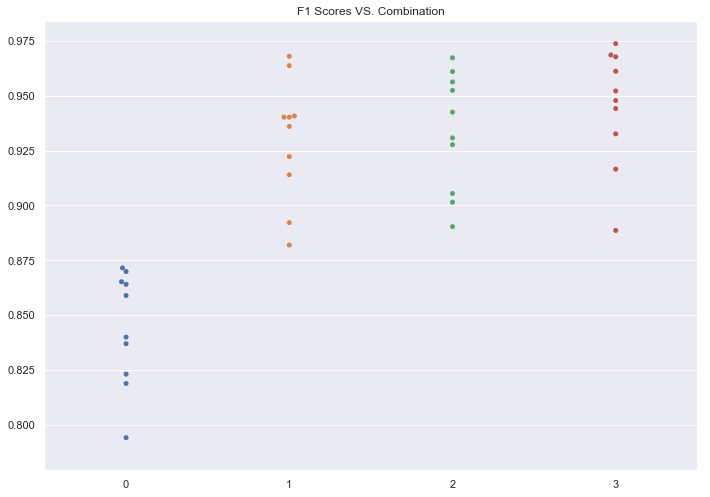

In [34]:
import warnings
warnings.simplefilter("ignore", UserWarning)

scorer = make_scorer(f1_score, average='macro', pos_label=0)
initial_phi_func = ['linear', 'sigmoid', 'relu', 'silu']
f1_list1 = []
for phi in initial_phi_func:
    scores = cross_val_score(estimator=MultiLayerPerceptron(n_hiddens_size=(50,50,), initial_phi_func=phi, obj_func='cross_entropy'),
                             X=X_train,
                             y=y_train,
                             scoring=scorer,
                             cv=10,
                             n_jobs=1)
    f1_list1.append(scores)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.swarmplot(data=f1_list1).set_title('F1 Scores VS. Combination')

Then we start visualizing the performance between different phi functions. For all phi functions we have ['linear', 'sigmoid', 'relu', 'silu'], we put them in a for loop, we use 10-fold cross validation and F1 score evaluation criteria to get F1 scores of different phi function. Then we plot a swarmplot for comparing their performance. We can see from above, the relu and silu phi function performs well than linear and sigmoid functions averagely. And silu performs litter better than relu function. 